<a href="https://colab.research.google.com/github/Material-Educativo/Tecnicas-heuristicas/blob/main/Recocido_simulado_vs_Alpine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Función Alpine
Empecemos viendo la regla de correspondencia y gráfica de la función Alpine.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import random
import math

import matplotlib.animation as animation
from IPython.display import Video  # Para mostrar el video en Colab


In [2]:
def rastrigin(x, y):
    return 20 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2 * np.pi * y)

In [3]:
def alpine(x, y):
    return np.abs(x * np.sin(x) + 0.1 * x) + np.abs(y * np.sin(y) + 0.1 * y)

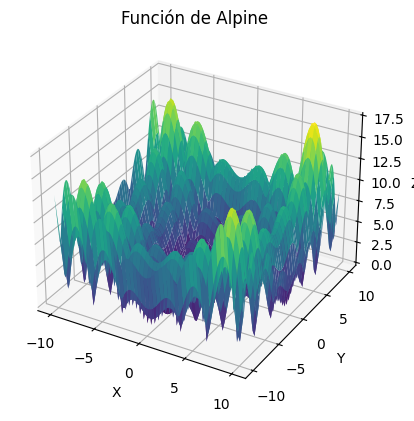

In [4]:
# Crear una malla de puntos para graficar la función
x = np.linspace(-10.0, 10.0, 100)
y = np.linspace(-10.0, 10.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie de la función
ax.plot_surface(X, Y, Z, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Título
plt.title('Función de Alpine')

# Mostrar la figura
plt.show()


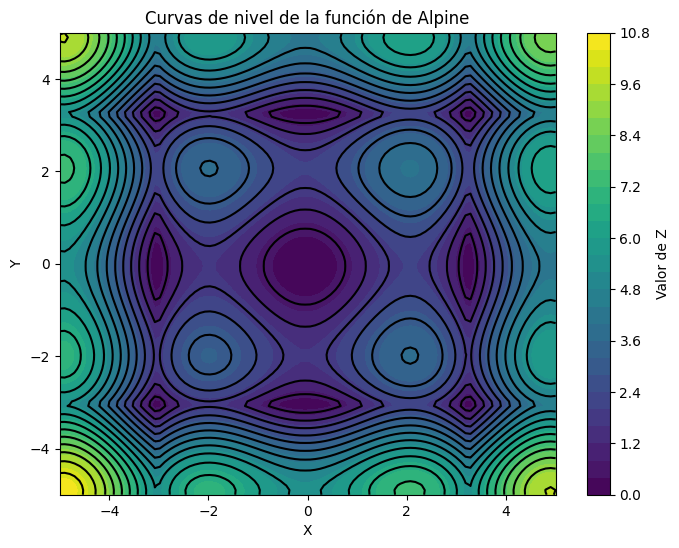

In [5]:
# Crear una malla de puntos para graficar las curvas de nivel
x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))  # Ajusta el tamaño aquí (ancho, alto)

# Graficar las curvas de nivel con un degradado continuo
contour = plt.contourf(X, Y, Z, levels=30, cmap='viridis')  # levels ajusta la cantidad de curvas de nivel

# Graficar las curvas de nivel con líneas negras para resaltarlas
plt.contour(X, Y, Z, levels=20, colors='black')  # levels ajusta la cantidad de curvas de nivel

# Etiquetas de los ejes
plt.xlabel('X')
plt.ylabel('Y')

# Título
plt.title('Curvas de nivel de la función de Alpine')

# Agregar la barra de color para el valor Z
plt.colorbar(contour, label='Valor de Z')

# Mostrar la gráfica
plt.show()


# Recocido simulado
Veamos el comportamiento de recocido simulado con la función alpine.

In [6]:
def recocido_simulado(temp_inicial, temp_final, enfriamiento, max_iter):
    x_actual = random.uniform(-5, 5)
    y_actual = random.uniform(-5, 5)
    valor_actual = alpine(x_actual, y_actual)

    # Guardar solución actual como mejor solución conocida
    mejor_x = x_actual
    mejor_y = y_actual
    mejor_valor = valor_actual

    # Guardar las coordenadas iniciales
    # para graficar el comportamiento del algoritmo
    coordenadas_x = [x_actual]
    coordenadas_y = [y_actual]
    costos = [valor_actual]

    temperatura = temp_inicial

    while temperatura > temp_final:
        aceptada = 1.0
        visitada = 1.0
        for i in range(max_iter):

            # Generar un vecino aleatorio
            vecino_x = x_actual + random.uniform(-0.1, 0.1)
            vecino_y = y_actual + random.uniform(-0.1, 0.1)

            # Revisar que los valores estén en [-5, 5]
            if vecino_x < -5.0:
              vecino_x = -5 - (vecino_x + 5)
            if vecino_x > 5.0:
              vecino_x = 5 - (vecino_x - 5)
            if vecino_y < -5.0:
              vecino_y = -5 - (vecino_y + 5)
            if vecino_y > 5.0:
              vecino_y = 5 - (vecino_y - 5)

            # Calcular la diferencia de valor entre la solución vecina
            # y la solución actual
            valor_vecino = alpine(vecino_x, vecino_y)
            diferencia_valor = valor_vecino - valor_actual

            if diferencia_valor > 0:
                visitada += 1.0

            # Aceptar solución vecina si: tiene un mejor valor o
            # si la probabilidad de aceptación lo favorece
            if diferencia_valor <= 0 or random.random() < math.exp(-diferencia_valor / temperatura):
                x_actual = vecino_x
                y_actual = vecino_y
                valor_actual = valor_vecino

                # Revisar si se debe actualizar la mejor solución encontrada
                if valor_actual < mejor_valor:
                    mejor_x = x_actual
                    mejor_y = y_actual
                    mejor_valor = valor_actual

        # Guardar las coordenadas de la solución actual
        # para graficar el comportamiento del algoritmo
        coordenadas_x.append(x_actual)
        coordenadas_y.append(y_actual)
        costos.append(valor_actual)

        # Enfriar el algoritmo
        temperatura = temperatura * enfriamiento

    return mejor_x, mejor_y, mejor_valor, coordenadas_x, coordenadas_y, costos

In [7]:
# Parámetros del algoritmo
temp_inicial = 50
temp_final = 0.001
enfriamiento = 0.95
max_iter = 100

# Ejecutar el algoritmo de recocido simulado
x, y, valor, coor_x, coor_y, valores = recocido_simulado(temp_inicial, temp_final, enfriamiento, max_iter)

print("Mejor solución encontrada:")
print("X:", x)
print("Y:", y)
print("Valor de Alpine:", valor)

Mejor solución encontrada:
X: -0.1002239401209123
Y: -0.09941866072194926
Valor de Alpine: 7.970654396951236e-05


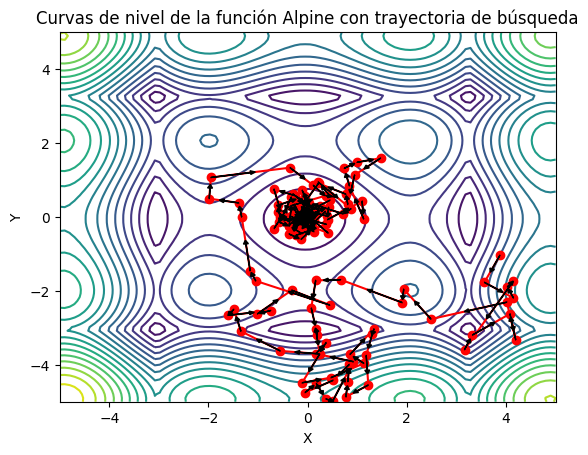

In [8]:
#Buscamos coordenadas máxima y mínima, y agregamos un margen
max_x = 5.12
min_x = - 5.12
max_y = 5.12
min_y = - 5.12

# Ajustar los valores de min_x y max_x dentro del intervalo [-5, 5]
if min_x < -5:
    min_x = -5
if max_x > 5:
    max_x = 5

# Ajustar los valores de min_y y max_y dentro del intervalo [-5, 5]
if min_y < -5:
    min_y = -5
if max_y > 5:
    max_y = 5

# Crear una malla de puntos para graficar las curvas de nivel
x = np.linspace(min_x, max_x, 100)
y = np.linspace(min_y, max_y, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Graficar las curvas de nivel
plt.contour(X, Y, Z, levels=20)

# Graficar las trayectorias seguidas por el algoritmo
plt.plot(coor_x, coor_y, color='red', marker='o', linestyle='-')

# Agregar flechas para indicar la dirección del movimiento
for i in range(1, len(coor_x) -1):
    plt.arrow(coor_x[i-1], coor_y[i-1], (coor_x[i] - coor_x[i-1]) *0.5, (coor_y[i] - coor_y[i-1]) * 0.5,
              color='black', head_width=0.1, head_length=0.1, zorder=10)

# Etiquetas de los ejes
plt.xlabel('X')
plt.ylabel('Y')

# Título
plt.title('Curvas de nivel de la función Alpine con trayectoria de búsqueda')

# Mostrar la gráfica
plt.show()

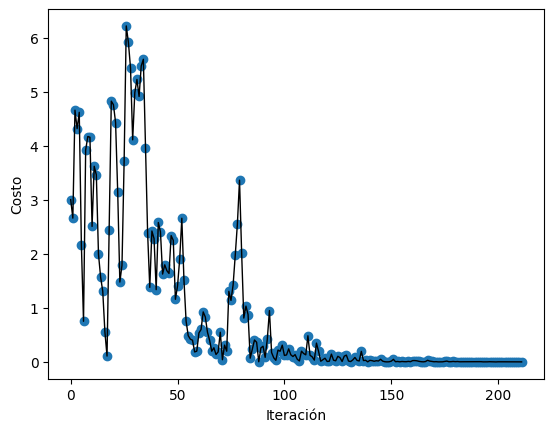

In [9]:
# La posición en la lista como valores "x"
valores_x = list(range(len(valores)))

# Conectar los puntos consecutivos con una línea negra
plt.plot(valores_x, valores, color='black', linestyle='-', linewidth=1, label='Línea')

# Crear la gráfica de dispersión
plt.scatter(valores_x, valores)

# Agregar etiquetas a los ejes
plt.xlabel("Iteración")
plt.ylabel("Costo")

# Mostrar la gráfica
plt.show()

#Veamos una animación

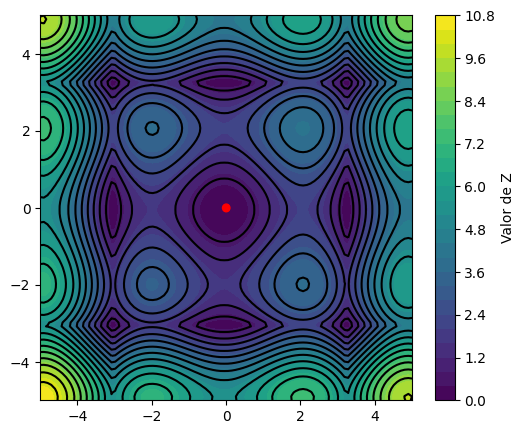

In [10]:
# Crear la malla de puntos para las curvas de nivel
x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(6, 5))

# Graficar las curvas de nivel con un degradado continuo
contour = ax.contourf(X, Y, Z, levels=30, cmap='viridis')  # niveles ajusta la cantidad de curvas de nivel
ax.contour(X, Y, Z, levels=20, colors='black')  # curvas de nivel con líneas negras

# Agregar la barra de color
plt.colorbar(contour, ax=ax, label='Valor de Z')


# Inicializar el círculo
circle = plt.Circle((coor_x[0], coor_y[0]), 0.1, color='red', zorder=5)
ax.add_artist(circle)

# Función de actualización para la animación
def update(frame):
    # Actualizar la posición del círculo
    circle.set_center((coor_x[frame], coor_y[frame]))
    return circle,

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(coor_x), interval=50, blit=True)

# Guardar la animación como archivo MP4
ani.save('animacion.mp4', writer='ffmpeg', fps=1)

# Mostrar el video dentro de Google Colab
Video('animacion.mp4', embed=True)
